<a href="https://colab.research.google.com/github/PuiPu/data_sci_final_project/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 匯入 github

In [2]:
# 使用個人訪問令牌克隆私有存儲庫
!git clone https://github.com/PuiPu/data_sci_final_project.git

fatal: destination path 'data_sci_final_project' already exists and is not an empty directory.


# ARIMA (Gemini)

In [6]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# 讀取克隆的存儲庫中的 .csv 文件
df = pd.read_csv('/content/data_sci_final_project/aapl_us_d.csv')
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)  # 确保索引为 datetime 格式
df = df.resample('D').mean()

# Split the data into training and testing sets
train_data = df[:'2014-11-6']
test_data = df['2014-11-7':] # 先用到2023，照理講應該要到2024(總共14年)

# 新的預測起始日期
train_end_date = '2024-09-06' # 最後一筆資料
train_data = df[:train_end_date]
test_data = df[train_end_date:]  # 測試集可以很短，甚至只包含一個數據點

# 建立模型並預測
model = ARIMA(train_data['Close'], order=(2, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)

print(forecast)

2024-09-07    221.084041
2024-09-08    221.038414
2024-09-09    221.058410
2024-09-10    221.043068
2024-09-11    221.056718
2024-09-12    221.044267
2024-09-13    221.055668
2024-09-14    221.045223
2024-09-15    221.054793
2024-09-16    221.046024
Freq: D, Name: predicted_mean, dtype: float64


# 畫出趨勢線

14610


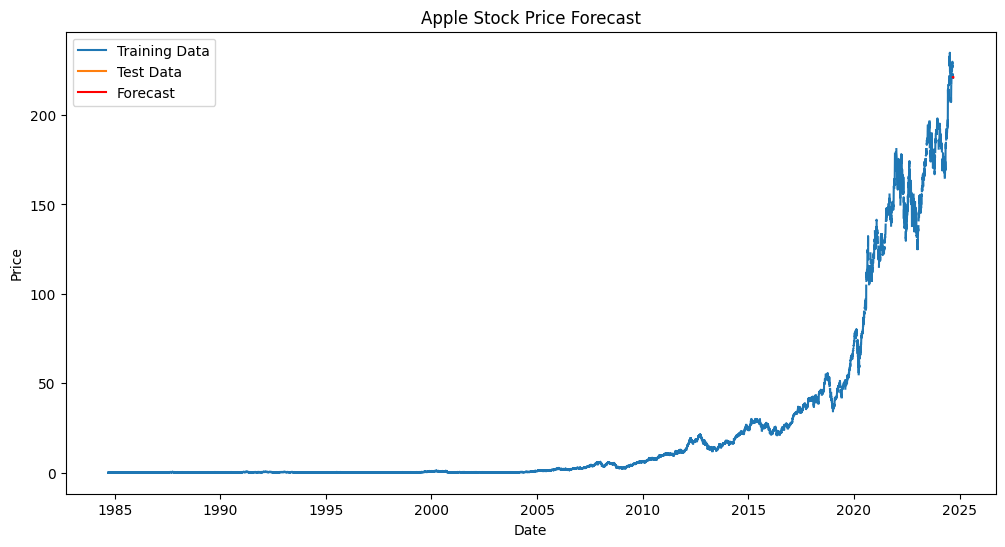

In [7]:
import matplotlib.pyplot as plt

print(len(train_data))

# 繪製圖表
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Test Data')

forecast_index = pd.date_range(start=test_data.index[-1], periods=len(forecast), freq='D')
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title('Apple Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()